In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [71]:
df = pd.read_csv('housing.csv')

In [72]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [73]:
df.shape

(20640, 10)

In [74]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [76]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [77]:
df.drop(['longitude', 'latitude'],axis=1,inplace=True)

In [78]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [79]:
df.value_counts('ocean_proximity')

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [80]:
op = []
for i in df['ocean_proximity']:
    if i == '<1H OCEAN':
        op.append(1)
    elif i == 'INLAND':
        op.append(2)
    elif i == 'NEAR OCEAN':
        op.append(3)
    elif i == 'NEAR BAY':
        op.append(4)
    else:
        op.append(5)
df['ocean_proximity'] = op

In [81]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


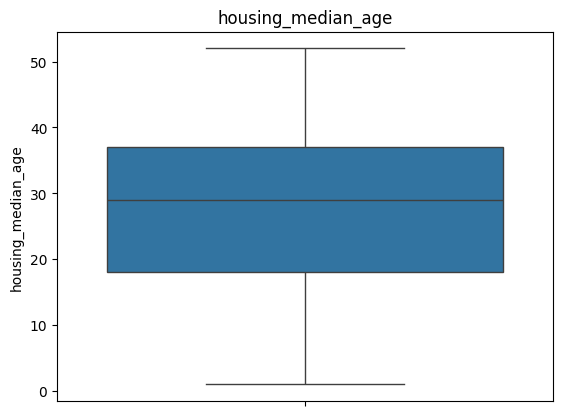

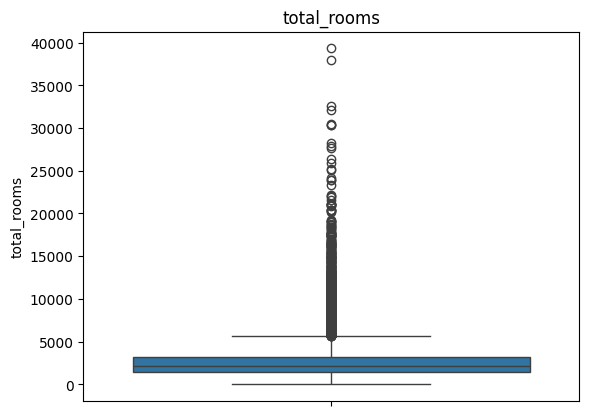

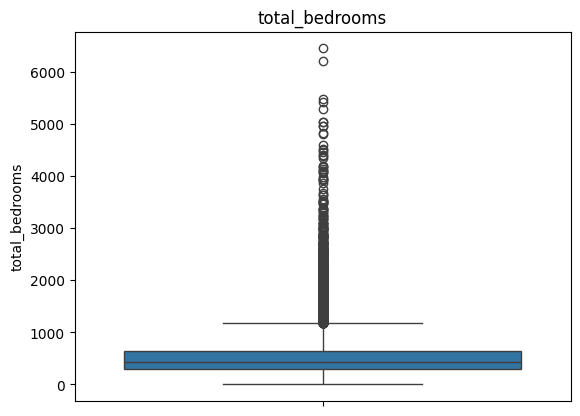

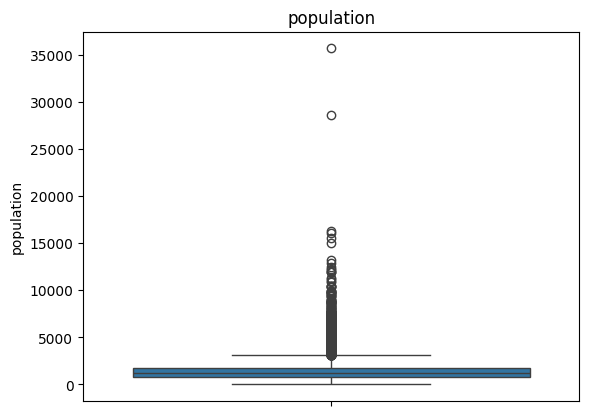

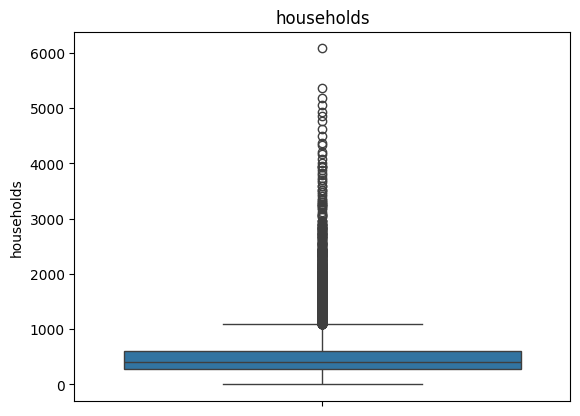

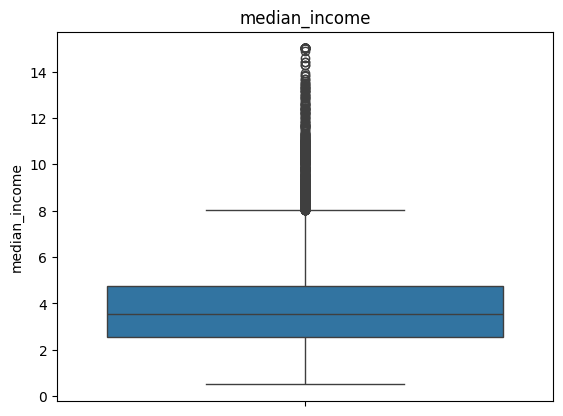

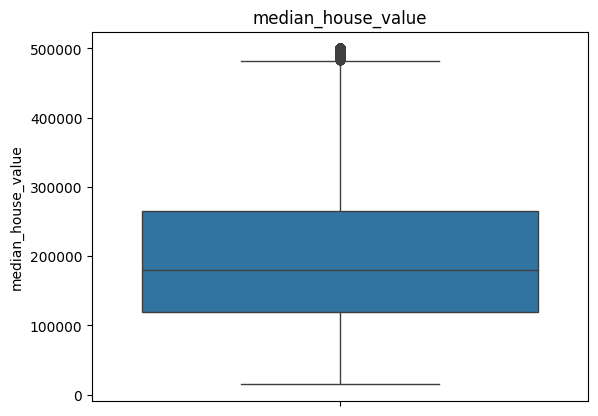

In [82]:
for i in ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

In [83]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,1.908769
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.004549
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,2.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,5.000000


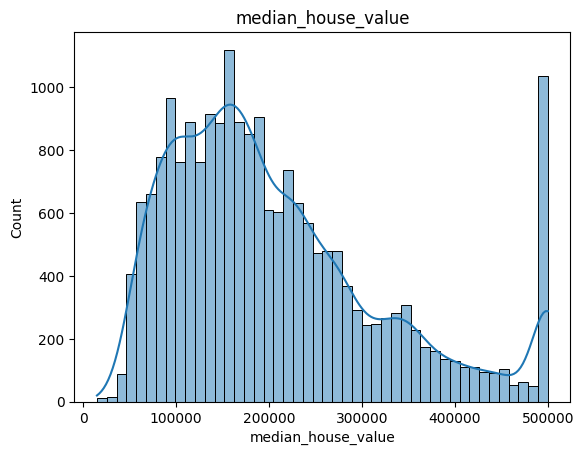

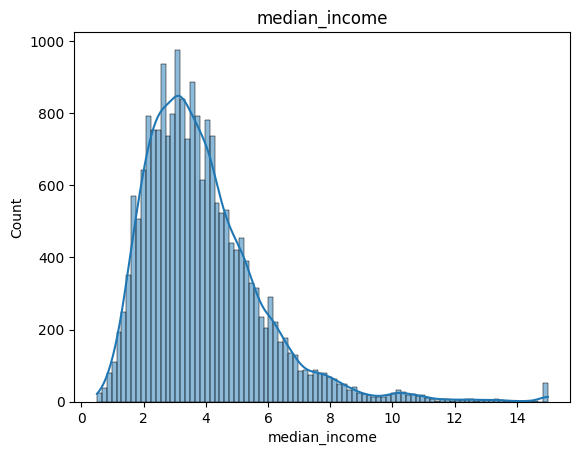

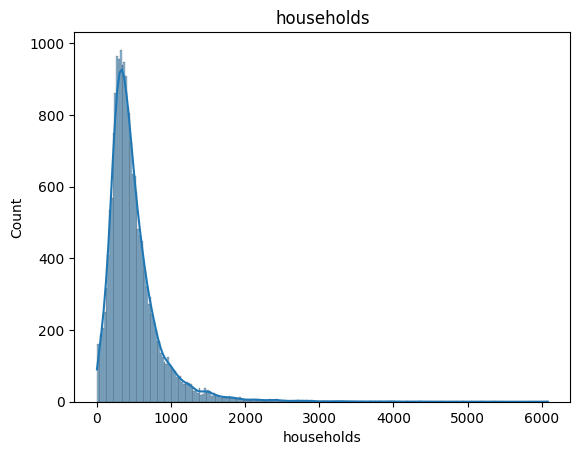

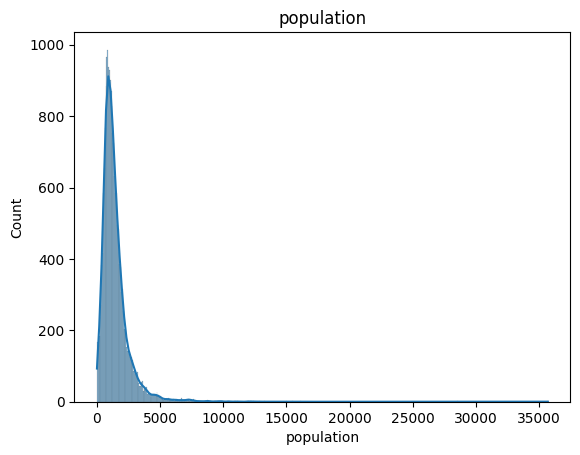

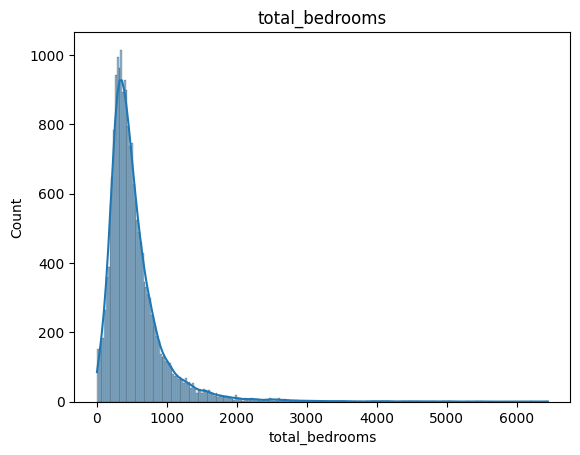

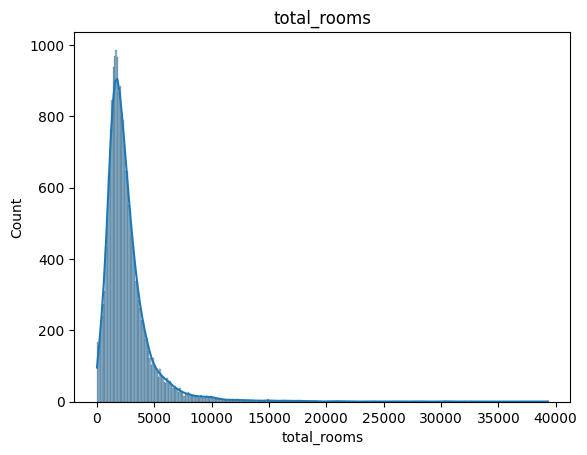

In [84]:
for i in ['median_house_value','median_income','households','population','total_bedrooms','total_rooms']:
    plt.title(i)
    sns.histplot(df[i],kde=True)
    plt.show()

In [85]:
for i in ['median_house_value','median_income','households','population','total_bedrooms','total_rooms']:
    print('*'*50)
    print(i)
    print('---------------------------------------')
    print(f'25th percentile (Q1) = {df[i].quantile(0.25)}')
    print(f'75th percentile (Q3) = {df[i].quantile(0.75)}')
    print(f'IQR = {df[i].quantile(0.75) - df[i].quantile(0.25)}')
    print(f'Lower fence value = {df[i].quantile(0.25) - (1.5*(df[i].quantile(0.75) - df[i].quantile(0.25)))}')
    print(f'Upper fence value = {df[i].quantile(0.75) + (1.5*(df[i].quantile(0.75) - df[i].quantile(0.25)))}')
    print('*'*50)
    print('\n')

**************************************************
median_house_value
---------------------------------------
25th percentile (Q1) = 119600.0
75th percentile (Q3) = 264725.0
IQR = 145125.0
Lower fence value = -98087.5
Upper fence value = 482412.5
**************************************************


**************************************************
median_income
---------------------------------------
25th percentile (Q1) = 2.5633999999999997
75th percentile (Q3) = 4.74325
IQR = 2.17985
Lower fence value = -0.7063750000000004
Upper fence value = 8.013024999999999
**************************************************


**************************************************
households
---------------------------------------
25th percentile (Q1) = 280.0
75th percentile (Q3) = 605.0
IQR = 325.0
Lower fence value = -207.5
Upper fence value = 1092.5
**************************************************


**************************************************
population
------------------------------------

In [86]:
d = {
    'Columns' : ['median_house_value','median_income','households','population','total_bedrooms','total_rooms'],
    'Q1 (25th)' : [df['median_house_value'].quantile(0.25),df['median_income'].quantile(0.25),df['households'].quantile(0.25),df['population'].quantile(0.25),df['total_bedrooms'].quantile(0.25),df['total_rooms'].quantile(0.25)],
    'Q3 (75th)' : [df['median_house_value'].quantile(0.75),df['median_income'].quantile(0.75),df['households'].quantile(0.75),df['population'].quantile(0.75),df['total_bedrooms'].quantile(0.75),df['total_rooms'].quantile(0.75)],
    'IQR' : [(df['median_house_value'].quantile(0.75)-df['median_house_value'].quantile(0.25)),(df['median_income'].quantile(0.75)-df['median_income'].quantile(0.25)),(df['households'].quantile(0.75)-df['households'].quantile(0.25)),(df['population'].quantile(0.75)-df['population'].quantile(0.25)),(df['total_bedrooms'].quantile(0.75)-df['total_bedrooms'].quantile(0.25)),(df['total_rooms'].quantile(0.75)-df['total_rooms'].quantile(0.25))],
    'Lower Fence' : [df['median_house_value'].quantile(0.25) - (1.5*(df['median_house_value'].quantile(0.75) - df['median_house_value'].quantile(0.25))),df['median_income'].quantile(0.25) - (1.5*(df['median_income'].quantile(0.75) - df['median_income'].quantile(0.25))),df['households'].quantile(0.25) - (1.5*(df['households'].quantile(0.75) - df['households'].quantile(0.25))),df['population'].quantile(0.25) - (1.5*(df['population'].quantile(0.75) - df['population'].quantile(0.25))),df['total_bedrooms'].quantile(0.25) - (1.5*(df['total_bedrooms'].quantile(0.75) - df['total_bedrooms'].quantile(0.25))),df['total_rooms'].quantile(0.25) - (1.5*(df['total_rooms'].quantile(0.75) - df['total_rooms'].quantile(0.25)))],
    'Upper Fence' : [df['median_house_value'].quantile(0.75) + (1.5*(df['median_house_value'].quantile(0.75) - df['median_house_value'].quantile(0.25))),df['median_income'].quantile(0.75) + (1.5*(df['median_income'].quantile(0.75) - df['median_income'].quantile(0.25))),df['households'].quantile(0.75) + (1.5*(df['households'].quantile(0.75) - df['households'].quantile(0.25))),df['population'].quantile(0.75) + (1.5*(df['population'].quantile(0.75) - df['population'].quantile(0.25))),df['total_bedrooms'].quantile(0.75) + (1.5*(df['total_bedrooms'].quantile(0.75) - df['total_bedrooms'].quantile(0.25))),df['total_rooms'].quantile(0.75) + (1.5*(df['total_rooms'].quantile(0.75) - df['total_rooms'].quantile(0.25)))],
    'Mean': [df['median_house_value'].mean(), df['median_income'].mean(), df['households'].mean(), df['population'].mean(), df['total_bedrooms'].mean(), df['total_rooms'].mean()]
}
Quartile_martix = pd.DataFrame(data=d)


In [87]:
Quartile_martix

,Columns,Q1 (25th),Q3 (75th),IQR,Lower Fence,Upper Fence,Mean
0,median_house_value,119600.0000,264725.00000,145125.00000,-98087.500000,482412.500000,206855.816909
1,median_income,2.5634,4.74325,2.17985,-0.706375,8.013025,3.870671
2,households,280.0000,605.00000,325.00000,-207.500000,1092.500000,499.539680
3,population,787.0000,1725.00000,938.00000,-620.000000,3132.000000,1425.476744
4,total_bedrooms,296.0000,647.00000,351.00000,-230.500000,1173.500000,537.870553
5,total_rooms,1447.7500,3148.00000,1700.25000,-1102.625000,5698.375000,2635.763081


In [88]:
mhv = []
mi = []
hh = []
popu = []
tbr = []
tr = []
for i in df['median_house_value']:
    if (i > 482412.5) or (i < -98087.500000):
        if i > 482412.5:
            mhv.append(482412.5)
        else:
            mhv.append(-98087.5)
    else:
        mhv.append(i)
for j in df['median_income']:
    if (j > 8.013025) or (j < -0.706375):
        if j > 8.013025:
            mi.append(8.013025)
        else:
            mi.append(-0.706375)
    else:
        mi.append(j)
for k in df['households']:
    if (k > 1092.5) or (k < -207.5):
        if k > 1092.5:
            hh.append(1092.5)
        else:
            hh.append(-207.5)
    else:
        hh.append(k)
for l in df['population']:
    if (l > 3132.0) or (l < -620.0):
        if l > 3132.0:
            popu.append(3132.0)
        else:
            popu.append(-620.0)
    else:
        popu.append(l)
for m in df['total_bedrooms']:
    if (m > 1173.5) or (m < -230.5):
        if m > 1173.5:
            tbr.append(1173.5)
        else:
            tbr.append(-230.5)
    else:
        tbr.append(m)
for n in df['total_rooms']:
    if (n > 5698.3750) or (n < -1102.6250):
        if n > 5698.3750:
            tr.append(5698.3750)
        else:
            tr.append(-1102.6250)
    else:
        tr.append(n)
df['median_house_value'] = mhv
df['median_income'] = mi
df['households'] = hh
df['population'] = popu
df['total_bedrooms'] = tbr
df['total_rooms'] = tr

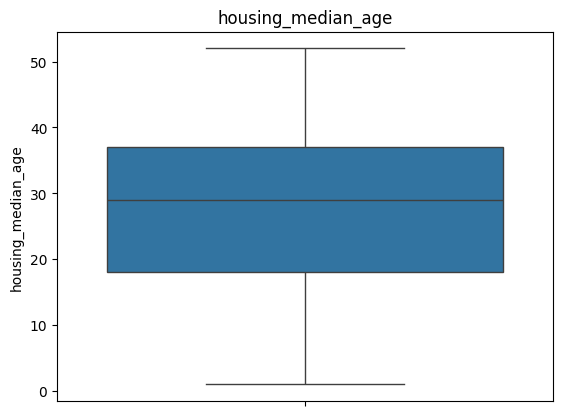

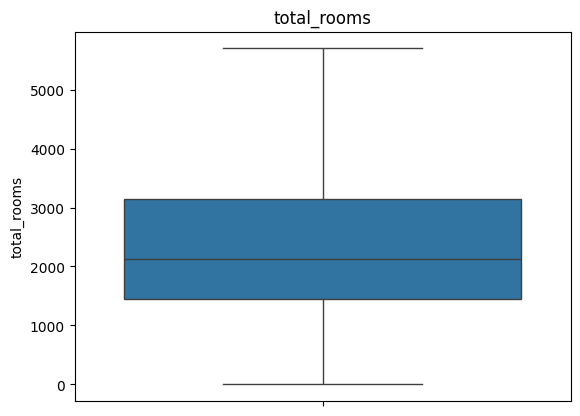

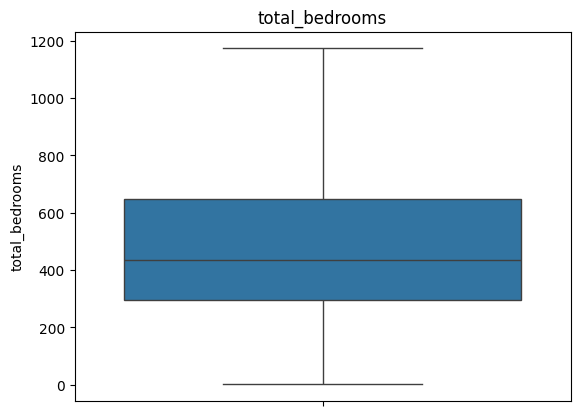

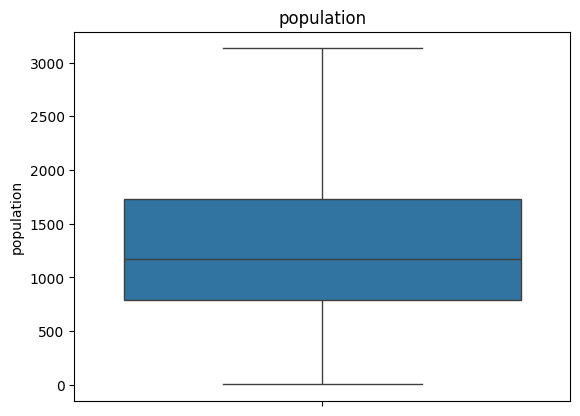

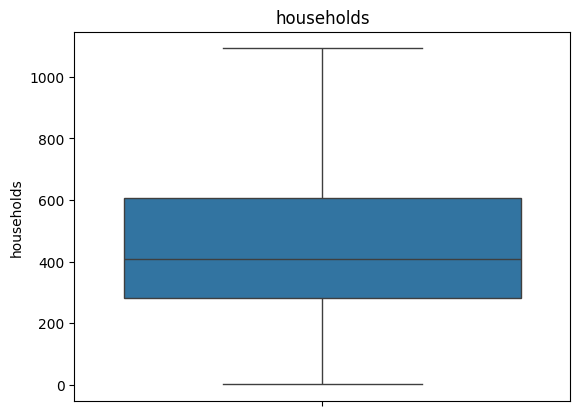

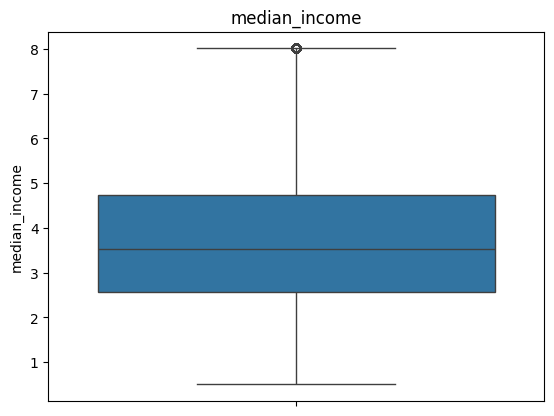

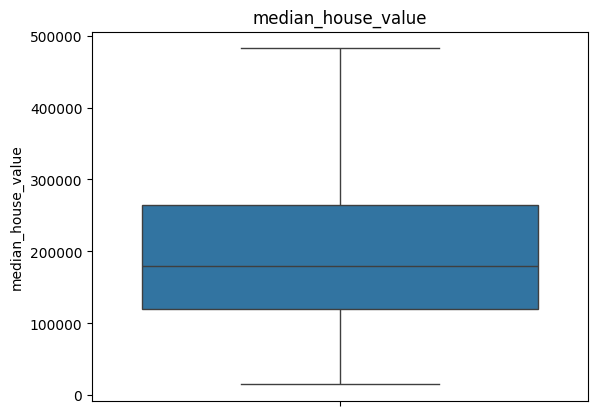

In [89]:
for i in ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']:
    plt.title(i)
    sns.boxplot(df[i])
    plt.show()

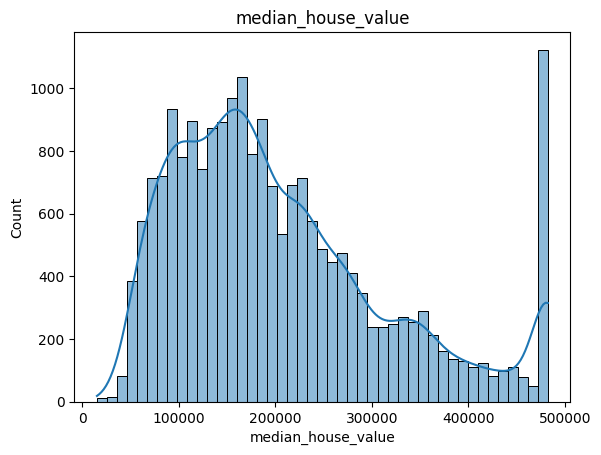

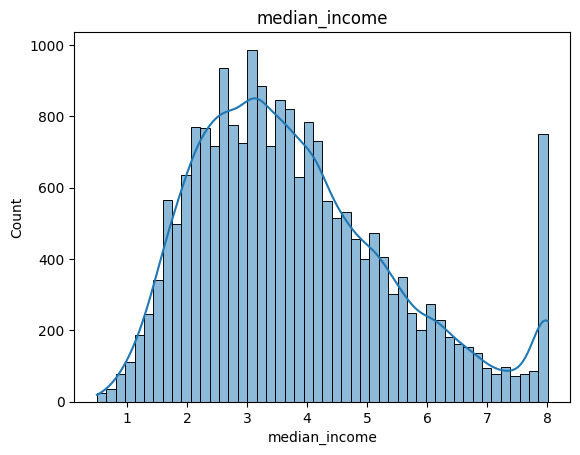

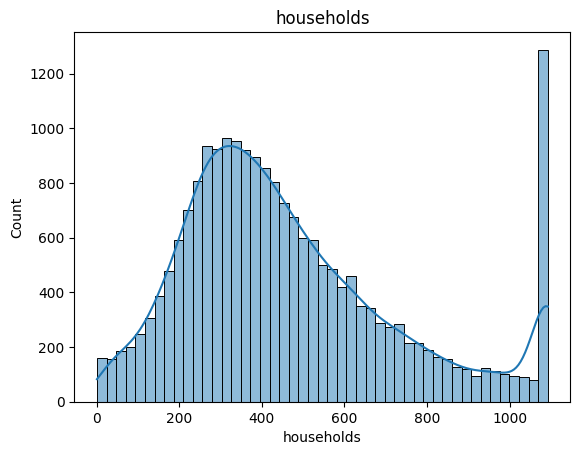

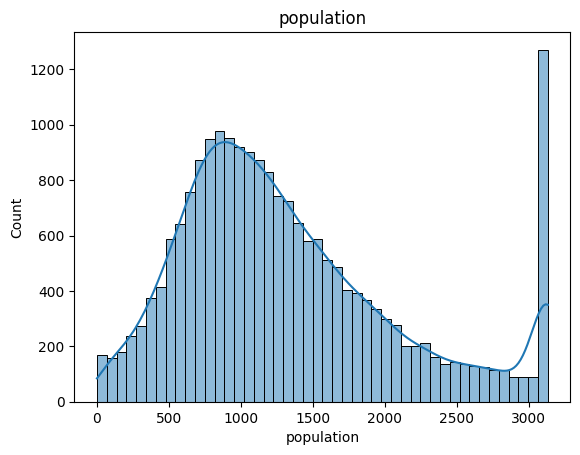

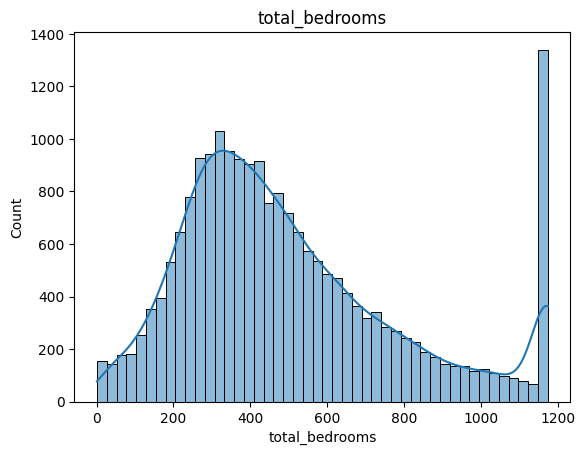

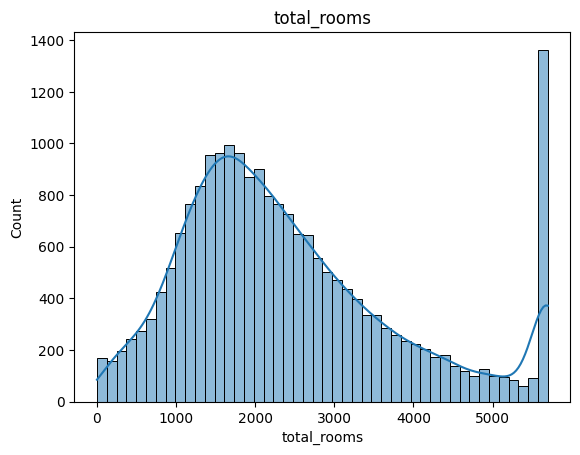

In [90]:
for i in ['median_house_value','median_income','households','population','total_bedrooms','total_rooms']:
    plt.title(i)
    sns.histplot(df[i],kde=True)
    plt.show()

In [91]:
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.000,129.0,322.0,126.0,8.013025,452600.0,4
1,21.0,5698.375,1106.0,2401.0,1092.5,8.013025,358500.0,4
2,52.0,1467.000,190.0,496.0,177.0,7.257400,352100.0,4
3,52.0,1274.000,235.0,558.0,219.0,5.643100,341300.0,4
4,52.0,1627.000,280.0,565.0,259.0,3.846200,342200.0,4


In [92]:
df.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [93]:
df.dropna(inplace=True)

In [94]:
df.shape

(20433, 8)

In [95]:
df.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

In [96]:
x = df[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households', 'median_income','ocean_proximity']]
y = df[['median_house_value']]

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [98]:
lr = LinearRegression()

In [99]:
lr.fit(x_train,y_train)

LinearRegression()

In [100]:
y_pred = lr.predict(x_test)

In [101]:
print(r2_score(y_test,y_pred))

0.6048884589418664


In [103]:
dtr = DecisionTreeRegressor()

In [104]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [105]:
y_pred_dtr = dtr.predict(x_test)

In [106]:
print(r2_score(y_test,y_pred_dtr))

0.48361916938853344


In [108]:
Quartile_martix

,Columns,Q1 (25th),Q3 (75th),IQR,Lower Fence,Upper Fence,Mean
0,median_house_value,119600.0000,264725.00000,145125.00000,-98087.500000,482412.500000,206855.816909
1,median_income,2.5634,4.74325,2.17985,-0.706375,8.013025,3.870671
2,households,280.0000,605.00000,325.00000,-207.500000,1092.500000,499.539680
3,population,787.0000,1725.00000,938.00000,-620.000000,3132.000000,1425.476744
4,total_bedrooms,296.0000,647.00000,351.00000,-230.500000,1173.500000,537.870553
5,total_rooms,1447.7500,3148.00000,1700.25000,-1102.625000,5698.375000,2635.763081


In [107]:
df.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2441.460456,502.538076,1336.329320,468.890227,3.801613,205986.986541,1.909411
std,12.591805,1396.935521,287.085265,764.984229,265.328645,1.657538,113251.106382,1.004574
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,1.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,2.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,2.000000
max,52.000000,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000,5.000000


In [110]:
a = {
    'Models' : ['Linear Regression','Decision Tree Regressor'],
    'Accuracy' : [f'{int(r2_score(y_test,y_pred)*100)} %',f'{int(r2_score(y_test,y_pred_dtr)*100)} %']
}
Accuracy_matrix = pd.DataFrame(data=a)

In [111]:
Accuracy_matrix

,Models,Accuracy
0,Linear Regression,60 %
1,Decision Tree Regressor,48 %
